# BOOMBIKES ASSIGNMENT

### Problem Statement 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Step1: Reading and Understanding the Data

In [1]:
import numpy as np 
import pandas as pd 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
#  Check the Head of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#  Check the tail of the dataset

bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
bike.shape 

(730, 16)

- There are 730 rows and 16 columns

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- There are no null values in the rows and columns  in the this Dataset
- All the columns have float and int datatype except dteday
- We have to check for the duplicates 
- We have to change the names of some columns for better understanding
  - yr:year
  - mnth:month
  - dteday:Date
  - atemp : aparent_temp
  - hum :humidity
  - cnt : count

In [7]:
# Lets check out is there any duplicates in this Dataset
bike.drop_duplicates(subset=None , inplace=True)
bike.shape

(730, 16)

In [8]:
bike.describe() # here we got the statistical summary of the data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- As the shape is retained , so there are no duplicates in this Dataset

## Step-2 Cleaning and Visualization of the Data

In [9]:
# coverting the 'dteday' column to datetime format as per data dictionary

bike['dteday'] = pd.to_datetime(bike["dteday"])

In [10]:
# Checking the datatype of dteday

print(bike.dtypes['dteday'])

datetime64[ns]


In [11]:
# Fixng the column name for the better readibility

bike = bike.rename(columns = {"dteday":'date','yr':'year','mnth':'month','atemp':'aparent_temp','hum':'humidity','cnt':'count'})

 - Categorical Variables 
   - year
   - month
   - holiday
   - workingday
   - weathersit
   - season
   - weekday
 - Numerical Variables
   - temp
   - aparent_temp
   - count
   - humidity
   - windspeed
   - date
   - instant

In [12]:
# As per data dictionary  the target variable count is a sum of 2 idenpendent 

# So lets validiate this relarionship before dropping these columns

bike['total_count'] = bike['casual'] + bike['registered']
bike[['total_count',"count"]].corr()

,total_count,count
total_count,1.0,1.0
count,1.0,1.0


In [13]:
# Correlation being 1 , dropping columns "casual","registered" and "total_count"

# We also drop the date column as we have already year and month coulmn 

#  Dropping column 'instant' as all values are unique and its most likely index 


bike.drop(["casual","registered","total_count","instant","date"],axis=1, inplace = True)

In [14]:
# Unique Values to identify variables type

bike.nunique().sort_values()

year              2
holiday           2
workingday        2
weathersit        3
season            4
weekday           7
month            12
temp            498
humidity        594
windspeed       649
aparent_temp    689
count           695
dtype: int64

In [15]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,aparent_temp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Observation
  - Now the Data is ready for the Visualization
  - We have clearlyt identified both continuous and categorical variables
  

In [16]:
# We will import important libraries for the visualization

import matplotlib.pyplot as plt
import seaborn as sns

### 1.Visualizing Numeric Variables

- Let's make a pair plot for all the Numeric variables

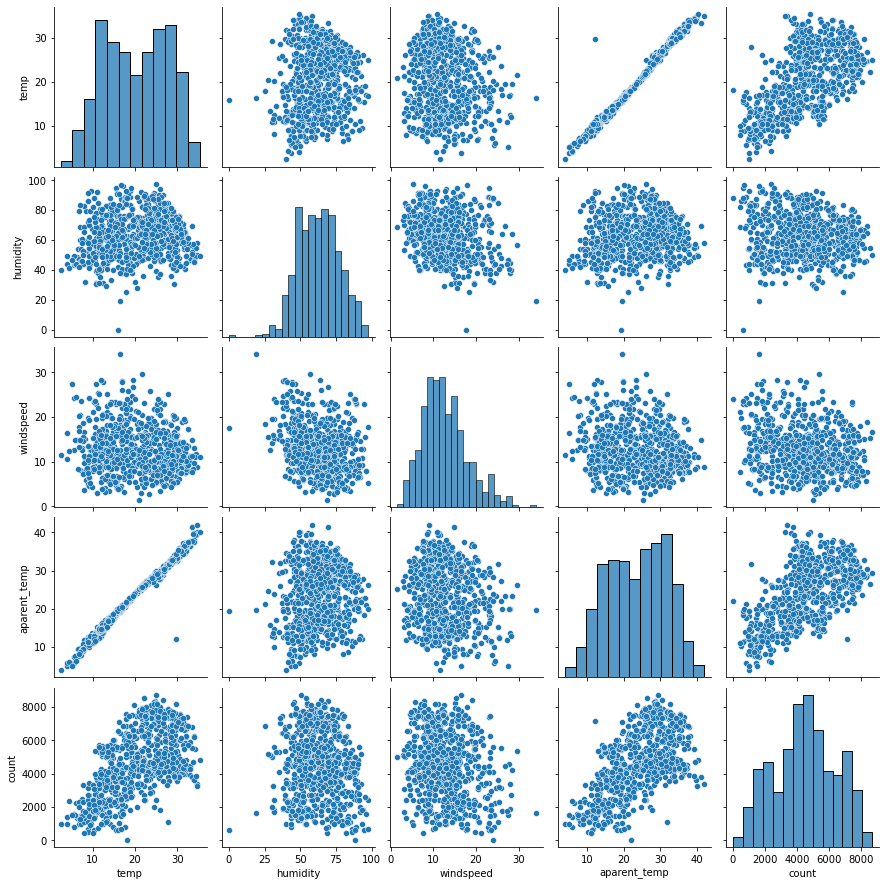

In [17]:
num_var = ['temp', 'humidity', 'windspeed', 'aparent_temp', 'count']
sns.pairplot(bike[num_var])
plt.show()

<AxesSubplot:>

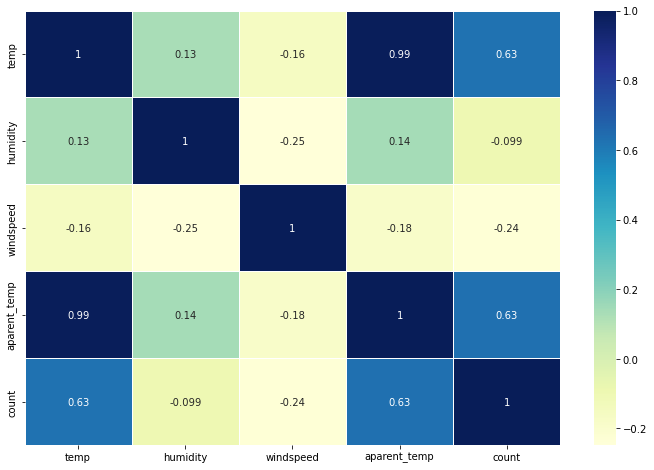

In [18]:
# Lets plot a heatmap for the continuous variables for better understanding

plt.figure(figsize = (12,8))
sns.heatmap(bike[num_var].corr(),annot = True,cmap='YlGnBu',linewidth=1)

#### Observation
- Temp and Apparent_temp have a very strong collinear relationship. So one of column will be dropped later
- Correlation between count and temp/aparent_temp is moderate so we can build linear model using temp featue
- we can focus on our target variable i.e. count

###  2.Visualizing Categorical Variables

In [19]:
cat_var = ['season', 'weathersit', 'year', 'month', 'holiday', 'weekday', 'workingday']
cat_var

['season', 'weathersit', 'year', 'month', 'holiday', 'weekday', 'workingday']

Text(0.5, 1.0, 'Weathersit vs Count')

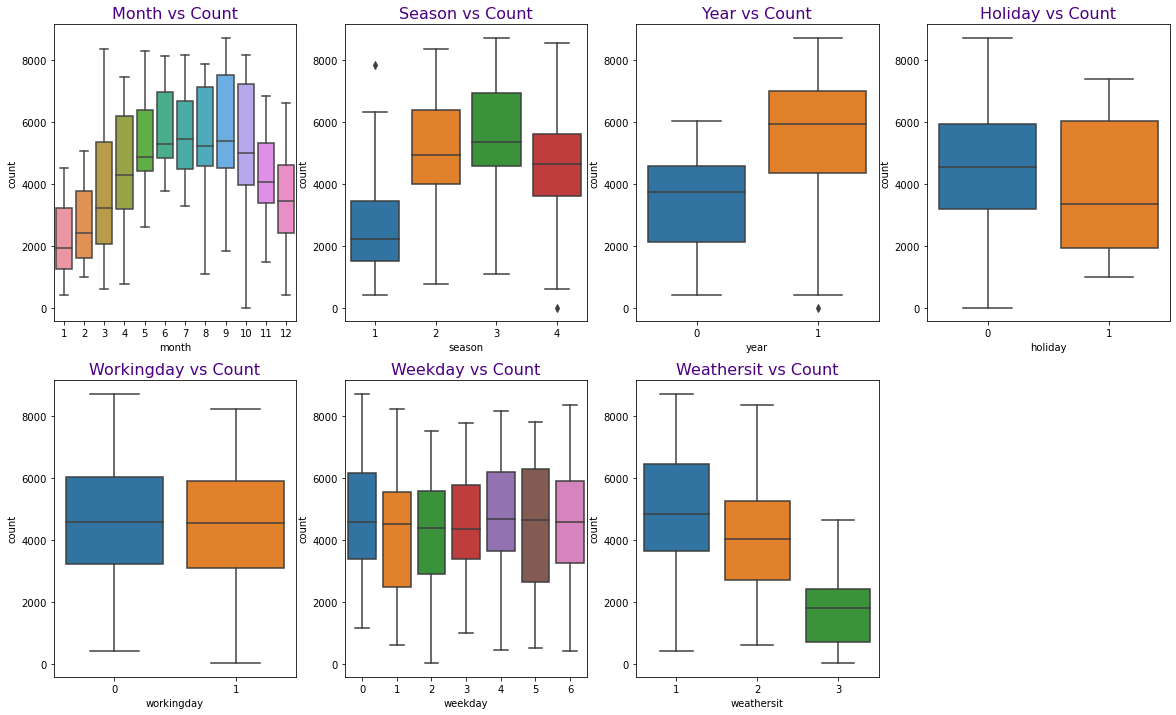

In [20]:
# We will make Box Plot for the categorical variables
plt.figure(figsize = (20,12))
plt.subplot(2,4,1)
sns.boxplot(x = "month" , y = "count" , data = bike)
plt.title("Month vs Count", fontsize = 16 , color = "indigo")

plt.subplot(2,4,2)
sns.boxplot(x = "season" , y = "count" , data = bike)
plt.title("Season vs Count", fontsize = 16 , color = "indigo")

plt.subplot(2,4,3)
sns.boxplot(x = "year" , y = "count" , data = bike)
plt.title("Year vs Count", fontsize = 16 , color = "indigo")

plt.subplot(2,4,4)
sns.boxplot(x = "holiday" , y = "count" , data = bike)
plt.title("Holiday vs Count", fontsize = 16 , color = "indigo")

plt.subplot(2,4,5)
sns.boxplot(x = "workingday" , y = "count" , data = bike)
plt.title("Workingday vs Count", fontsize = 16 , color = "indigo")

plt.subplot(2,4,6)
sns.boxplot(x = "weekday" , y = "count" , data = bike)
plt.title("Weekday vs Count", fontsize = 16 , color = "indigo")

plt.subplot(2,4,7)
sns.boxplot(x = "weathersit" , y = "count" , data = bike)
plt.title("Weathersit vs Count", fontsize = 16 , color = "indigo")

### Observation
- Demand of the bike is high from the month of May to October as these months are of summer and fall season which is favourable for the riding 
- Demand of the bike is also good in the month of April which comes under spring season which is also good for the bike Riding
- we can clearly seen the demands of the bikes are higher in the year 2019 because its the second year of the company as the awarness is growing between the public
- As we can see that on the holidays the demands of the bike are low 
- The Demands of the bikes are very low on the heavy rainy/Snowfall/foggy day


#### Lets do some more statistical detailed analysis of each categorical variable

In [21]:
# creating function for the analysis of each categorical variables

def stats_plots_for_catogries(cat_var):
    
    # calculating percentage of booking against each respective category
    
    pivot_bike_categorical = bike.pivot_table(index = [cat_var],values = "count" , aggfunc = "sum" )
    
    pivot_bike_categorical['count %age'] = (pivot_bike_categorical['count']/pivot_bike_categorical['count'].sum())*100
    
    print(pivot_bike_categorical.sort_values('count %age', ascending= False))

    pivot_bike_categorical.plot(kind= 'bar')
    
    # Plotting the count based on categorical variable chosen
    
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(cat_var,'count',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(cat_var,'count',data=bike, hue='year')
    plt.suptitle('Bike Rentals vs ' + cat_var)
    plt.show()
    return

          count  count %age
season                     
3       1061129   32.244879
2        918589   27.913469
4        841613   25.574374
1        469514   14.267278


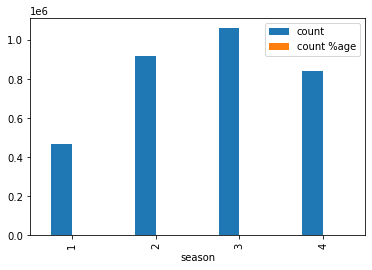

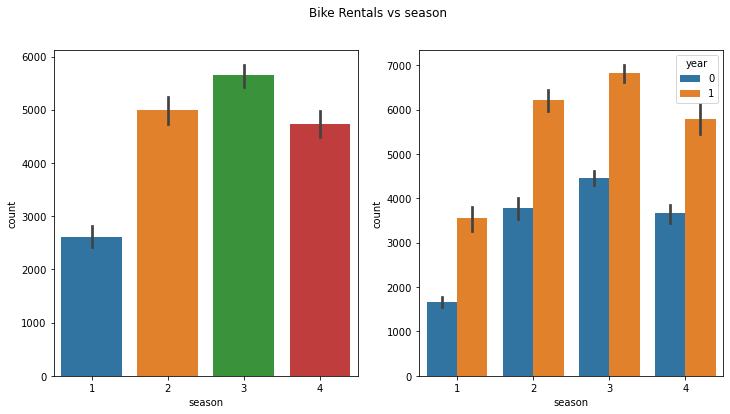

In [22]:
# Season

stats_plots_for_catogries('season')

### Obsevation
- We can clearly seen there 32% of bike booking in the fall season followed by summer season

        count  count %age
month                    
8      351194   10.671849
6      346342   10.524409
9      345991   10.513743
7      344948   10.482049
5      331686   10.079053
10     322352    9.795417
4      269094    8.177049
11     254831    7.743634
3      228920    6.956268
12     211036    6.412821
2      149518    4.543453
1      134933    4.100254


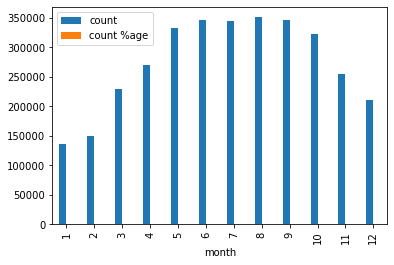

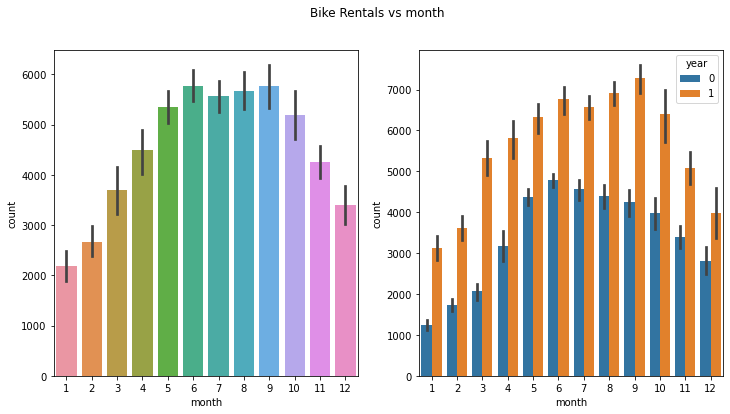

In [23]:
# month

stats_plots_for_catogries('month')

- We can see that the booking of the bike are higher from May to October so we can say that the Month is a good predictor

           count  count %age
holiday                     
0        3212410    97.61657
1          78435     2.38343


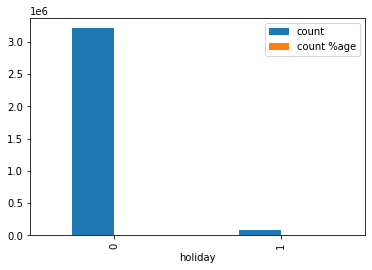

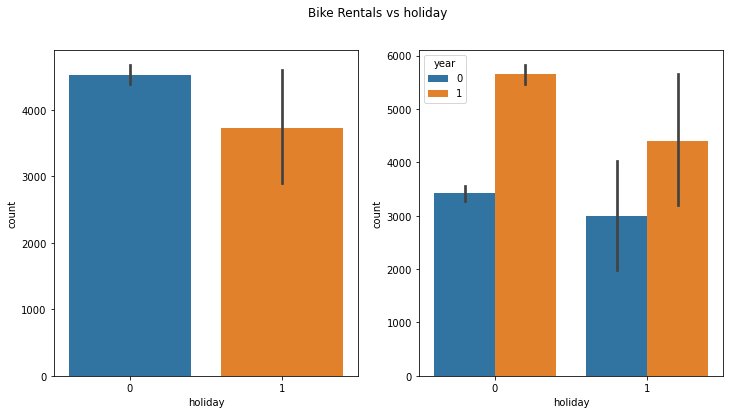

In [24]:
# Holiday

stats_plots_for_catogries('holiday')

- On a non-holiday the percentage of the booking of the bike is higher than the holiday so we can say it could be the good predictor 

          count  count %age
weekday                    
4        487923   14.826678
0        485235   14.744997
6        481176   14.621655
5        478132   14.529156
3        462276   14.047334
2        448822   13.638503
1        447281   13.591676


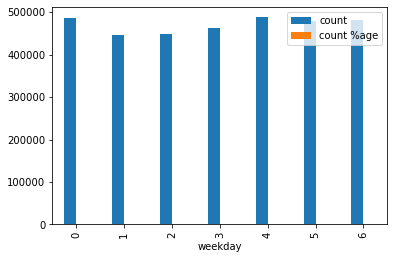

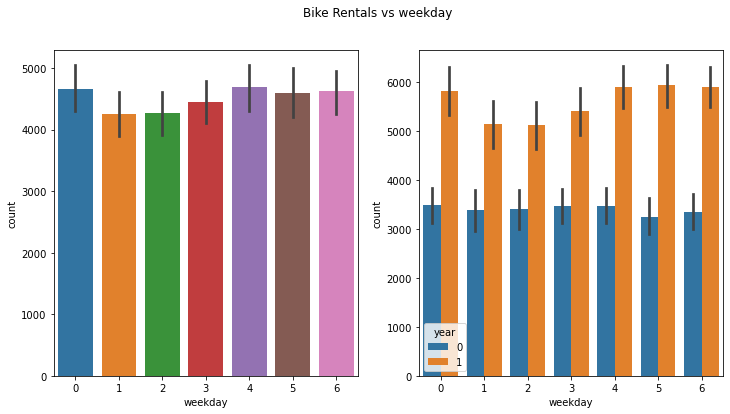

In [25]:
# Weekday

stats_plots_for_catogries('weekday')

- Weekday is not a good predictor because it is showing similar distribution for all the days of the weekday

              count  count %age
workingday                     
1           2253988   68.492682
0           1036857   31.507318


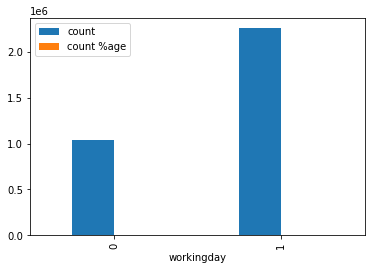

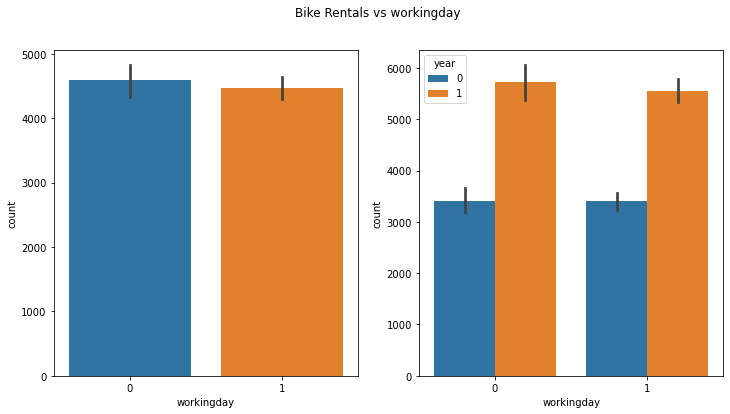

In [26]:
# Workingday

stats_plots_for_catogries('workingday')

- Almost 69% of the bike rental happen on the working day so we can  say that it is a good predictor

              count  count %age
weathersit                     
1           2257952   68.613137
2            995024   30.236125
3             37869    1.150738


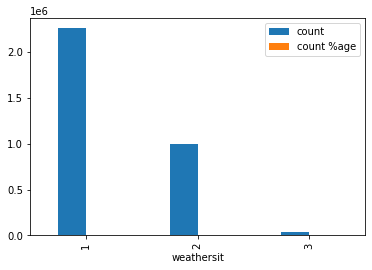

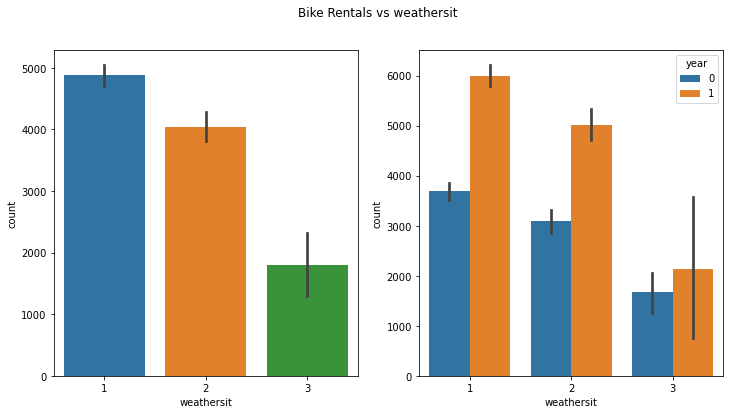

In [27]:
# Weathersit

stats_plots_for_catogries('weathersit')

- 68% of the bike rental happen on the clear or partky cloudy day so we can say  it is a good predictor

In [28]:
bike.shape

(730, 12)

In [29]:
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'aparent_temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [30]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,aparent_temp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3 : Data Preparation

#### Dummy Variables Ceation

In [31]:
# Creating Dummy variables for categorical variables i.e. season,weathersit,month,weekday

list_cat = ['season','month','weekday','weathersit']

In [32]:
bike_dummy = pd.get_dummies(data=bike, columns = list_cat ,drop_first = True)
bike_dummy.head()

,year,holiday,workingday,temp,aparent_temp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
bike_dummy.shape

(730, 30)

In [34]:
bike_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   aparent_temp  730 non-null    float64
 5   humidity      730 non-null    float64
 6   windspeed     730 non-null    float64
 7   count         730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

## Step 4 : Splitting the Data into Training and Test Sets

In [35]:
# Importing Some important libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

- Since the number of the records are very less so we can do 70:30 Split

In [36]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
bike_train ,bike_test = train_test_split(bike_dummy , train_size =0.7 , test_size = 0.3 , random_state = 100 )

In [37]:
# checking the shape of the Train data

bike_train.shape

(510, 30)

In [38]:
# checking the shape of the Test data

bike_test.shape

(219, 30)

#### Rescalling the Feature 

- There are two ways to perform the Rescalng Feature
  - Min-Max Scaling
  - Standardisation
  
- Here we will perform Min-Max Scaling

In [39]:
scaler = MinMaxScaler()


In [40]:
# Applying the scaler to al the nominal variables

num_var = ['temp', 'humidity', 'windspeed', 'aparent_temp', 'count']

bike_train[num_var] = scaler.fit_transform(bike_train[num_var])

In [41]:
bike_train.head()

,year,holiday,workingday,temp,aparent_temp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
#checking out statistical summary

bike_train.describe()

,year,holiday,workingday,temp,aparent_temp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Min-Max scaling are looking good 

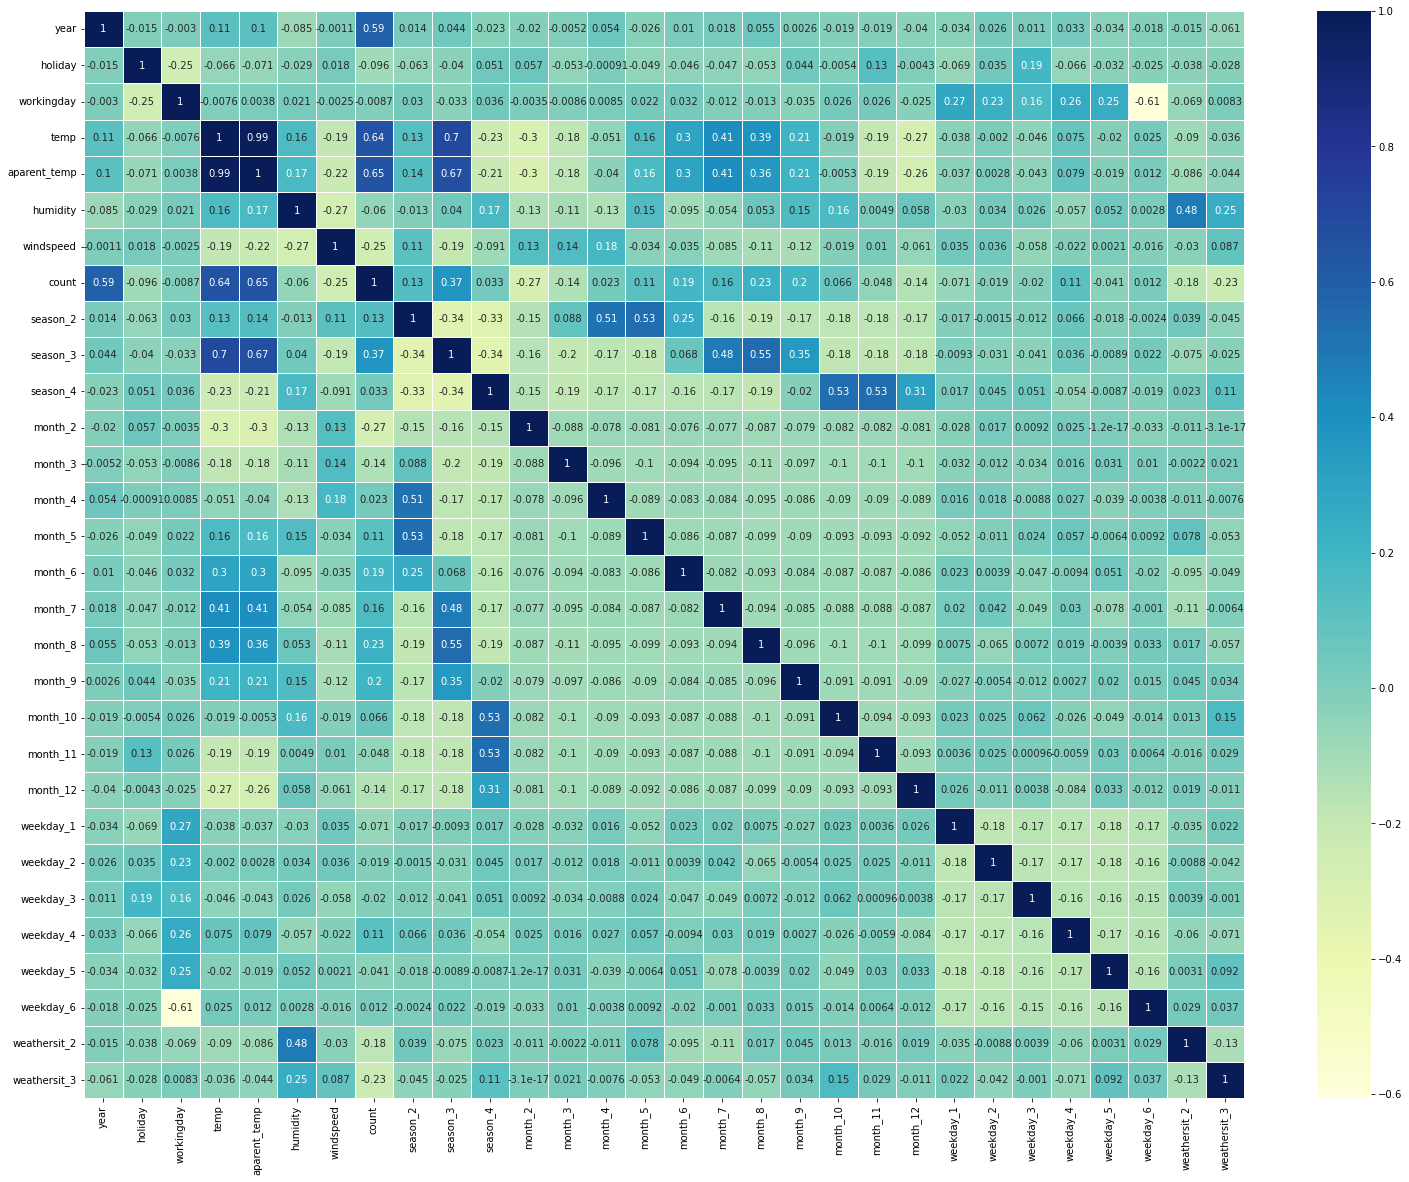

In [43]:
# Lets Check the correlation coefficient to see which variable are highly correlated

plt.figure(figsize = (26,20))
sns.heatmap(bike_train.corr(), annot = True , cmap = "YlGnBu" , linewidth = 1)
plt.show()

#### Obervation

- As we can see that the temp and aparent_temp are highly correaletd with each other it means we can buid our model using one of them
- temp and year have also good correlation i.e. 0.56 and .65 respectively


## Step 5: Building a Linear Model

#### Dividing into X and Y sets for the model building 

In [44]:
y_train = bike_train.pop('count')
x_train = bike_train

In [45]:
x_train.head()

,year,holiday,workingday,temp,aparent_temp,humidity,windspeed,season_2,season_3,season_4,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [47]:
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'aparent_temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

###  Model1

In [48]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm1 = sm.add_constant(x_train)

# Create a first fitted  model
lr_1 = sm.OLS(y_train, x_train_sm1)

# fit the model
lr_model1 = lr_1.fit()

# Check the Parameters Obtained
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.09e-178
Time:                        11:26:06   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2369      0.030      7.841      0.000       0.178       0.296
year             0.2309      0.008     28.359      0.000       0.215       0.247
holiday         -0.1352      0.065     -2.068      0.039      -0.264      -0.007
workingday      -0.0609      0.071     -0.856      0.392      -0.201       0.079
temp             0.4003      0.143      2.790      0.005       0.118       0.682
aparent_temp     0.0464      0.139      0.333      0.739      -0.227       0.320
humidity        -0.1578      0.039     -4.054      0.000      -0.234      -0.081
windspeed       -0.1811      0.027     -6.793      0.000      -0.234      -0.129
season_2         0.0859      0.024      3.601      0.000       0.039       0.133
season_3         0.0441      0.030      1.455      0.146      -0.015       0.104
season_4         0.1546      0.026      5.888      0.000       0.103       0.206
month_2          0.0263      0.021      1.264      0.207      -0.015       0.067
month_3          0.0643      0.023      2.847      0.005       0.020       0.109
month_4          0.0635      0.034      1.873      0.062      -0.003       0.130
month_5          0.0882      0.037      2.415      0.016       0.016       0.160
month_6          0.0656      0.040      1.658      0.098      -0.012       0.143
month_7          0.0295      0.045      0.663      0.508      -0.058       0.117
month_8          0.0865      0.042      2.036      0.042       0.003       0.170
month_9          0.1502      0.038      3.965      0.000       0.076       0.225
month_10         0.0694      0.035      1.995      0.047       0.001       0.138
month_11         0.0219      0.033      0.660      0.510      -0.043       0.087
month_12         0.0178      0.027      0.663      0.507      -0.035       0.070
weekday_1        0.0256      0.072      0.358      0.720      -0.115       0.166
weekday_2        0.0240      0.071      0.336      0.737      -0.116       0.164
weekday_3        0.0391      0.071      0.552      0.581      -0.100       0.178
weekday_4        0.0541      0.072      0.755      0.451      -0.087       0.195
weekday_5        0.0503      0.072      0.703      0.482      -0.090       0.191
weekday_6       -0.0060      0.015     -0.389      0.698      -0.036       0.024
weathersit_2    -0.0593      0.011     -5.627      0.000      -0.080      -0.039
weathersit_3    -0.2509      0.027     -9.402      0.000      -0.303      -0.198
==============================================================================
Omnibus:                       79.473   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.099
Skew:                          -0.773   Prob(JB):                     1.45e-46
Kurtosis:                       5.747   Cond. No.                         93.3
===============

In [49]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] =[variance_inflation_factor(x_train.values ,i ) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,447.16
4,aparent_temp,382.06
2,workingday,229.51
21,weekday_1,50.79
22,weekday_2,49.62
25,weekday_5,48.17
24,weekday_4,47.10
23,weekday_3,43.28
5,humidity,22.74
8,season_3,15.43


- According to the algorithm we will drop the columns in the following way
   - High p-value , high VIF (less significant and less correlated so we can drop these easily)
   - High-Low:
   - High p, Low VIF (Significant but low VIF) Remove first
   - Low p , High VIF (Insignificant but High VIF) Remove after first one
   - Low p , Low VIF

### Model 2

In [51]:
# We will drop the Aparent_temp because its p-value and vif both are very high

x2 = x_train.drop("aparent_temp", axis = 1)

In [52]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm2 = sm.add_constant(x2)

# Create a first fitted  model
lr_2 = sm.OLS(y_train, x_train_sm2)

# fit the model
lr_model2 = lr_2.fit()

# Check the Parameters Obtained
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.33e-179
Time:                        11:26:07   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2373      0.030      7.865      0.000       0.178       0.297
year             0.2309      0.008     28.387      0.000       0.215       0.247
holiday         -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday      -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp             0.4455      0.047      9.513      0.000       0.353       0.537
humidity        -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed       -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_2         0.0859      0.024      3.609      0.000       0.039       0.133
season_3         0.0437      0.030      1.444      0.149      -0.016       0.103
season_4         0.1546      0.026      5.894      0.000       0.103       0.206
month_2          0.0263      0.021      1.268      0.205      -0.014       0.067
month_3          0.0642      0.023      2.848      0.005       0.020       0.109
month_4          0.0636      0.034      1.880      0.061      -0.003       0.130
month_5          0.0877      0.036      2.405      0.017       0.016       0.159
month_6          0.0646      0.039      1.639      0.102      -0.013       0.142
month_7          0.0287      0.044      0.646      0.519      -0.059       0.116
month_8          0.0851      0.042      2.015      0.044       0.002       0.168
month_9          0.1497      0.038      3.958      0.000       0.075       0.224
month_10         0.0694      0.035      1.998      0.046       0.001       0.138
month_11         0.0221      0.033      0.665      0.507      -0.043       0.087
month_12         0.0179      0.027      0.671      0.503      -0.035       0.071
weekday_1        0.0253      0.072      0.354      0.723      -0.115       0.166
weekday_2        0.0237      0.071      0.333      0.740      -0.116       0.163
weekday_3        0.0387      0.071      0.548      0.584      -0.100       0.178
weekday_4        0.0538      0.072      0.751      0.453      -0.087       0.195
weekday_5        0.0500      0.071      0.699      0.485      -0.091       0.190
weekday_6       -0.0064      0.015     -0.413      0.680      -0.037       0.024
weathersit_2    -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_3    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         82.8
==============================================================================

Notes:
[1] Stand

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF'] =[variance_inflation_factor(x2.values ,i ) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,229.44
20,weekday_1,50.78
21,weekday_2,49.62
24,weekday_5,48.16
23,weekday_4,47.09
3,temp,47.05
22,weekday_3,43.27
4,humidity,22.60
7,season_3,15.41
15,month_8,10.98


### Model 3

In [54]:
# We will drop the weekday_1 because its p-value and vif both are very high

x3 = x2.drop('weekday_1', axis=1)

In [55]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm3 = sm.add_constant(x3)

# Create a first fitted  model
lr_3 = sm.OLS(y_train, x_train_sm3)

# fit the model
lr_model3 = lr_3.fit()

# Check the Parameters Obtained
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.8
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.51e-180
Time:                        11:26:07   Log-Likelihood:                 523.74
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     482   BIC:                            -872.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2373      0.030      7.873      0.000       0.178       0.297
year             0.2310      0.008     28.473      0.000       0.215       0.247
holiday         -0.1147      0.029     -3.912      0.000      -0.172      -0.057
workingday      -0.0359      0.015     -2.446      0.015      -0.065      -0.007
temp             0.4459      0.047      9.535      0.000       0.354       0.538
humidity        -0.1569      0.039     -4.043      0.000      -0.233      -0.081
windspeed       -0.1833      0.026     -7.054      0.000      -0.234      -0.132
season_2         0.0858      0.024      3.608      0.000       0.039       0.133
season_3         0.0435      0.030      1.438      0.151      -0.016       0.103
season_4         0.1541      0.026      5.889      0.000       0.103       0.206
month_2          0.0264      0.021      1.270      0.205      -0.014       0.067
month_3          0.0640      0.023      2.842      0.005       0.020       0.108
month_4          0.0636      0.034      1.880      0.061      -0.003       0.130
month_5          0.0873      0.036      2.399      0.017       0.016       0.159
month_6          0.0643      0.039      1.635      0.103      -0.013       0.142
month_7          0.0285      0.044      0.641      0.522      -0.059       0.116
month_8          0.0849      0.042      2.012      0.045       0.002       0.168
month_9          0.1497      0.038      3.962      0.000       0.075       0.224
month_10         0.0696      0.035      2.006      0.045       0.001       0.138
month_11         0.0215      0.033      0.650      0.516      -0.044       0.087
month_12         0.0181      0.027      0.678      0.498      -0.034       0.071
weekday_2       -0.0010      0.014     -0.072      0.943      -0.029       0.027
weekday_3        0.0143      0.015      0.958      0.338      -0.015       0.044
weekday_4        0.0290      0.015      1.977      0.049       0.000       0.058
weekday_5        0.0252      0.014      1.738      0.083      -0.003       0.054
weekday_6       -0.0069      0.015     -0.451      0.652      -0.037       0.023
weathersit_2    -0.0593      0.011     -5.641      0.000      -0.080      -0.039
weathersit_3    -0.2514      0.027     -9.462      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.795   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.203
Skew:                          -0.770   Prob(JB):                     1.01e-45
Kurtosis:                       5.717   Cond. No.                         45.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] =[variance_inflation_factor(x3.values ,i ) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,47.02
4,humidity,22.54
7,season_3,15.40
15,month_8,10.97
8,season_4,10.94
14,month_7,9.66
2,workingday,9.15
6,season_2,8.90
13,month_6,7.37
16,month_9,7.36


### Model 4

In [57]:
# High p, Low VIF (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_2 because its p-value is very high and vif are low 


x4 = x3.drop('weekday_2', axis=1)

In [58]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm4 = sm.add_constant(x4)

# Create a first fitted  model
lr_4 = sm.OLS(y_train, x_train_sm4)

# fit the model
lr_model4 = lr_4.fit()

# Check the Parameters Obtained
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.35e-181
Time:                        11:26:07   Log-Likelihood:                 523.74
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     483   BIC:                            -879.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2375      0.030      7.907      0.000       0.178       0.296
year             0.2310      0.008     28.523      0.000       0.215       0.247
holiday         -0.1153      0.028     -4.072      0.000      -0.171      -0.060
workingday      -0.0364      0.013     -2.813      0.005      -0.062      -0.011
temp             0.4458      0.047      9.550      0.000       0.354       0.537
humidity        -0.1570      0.039     -4.058      0.000      -0.233      -0.081
windspeed       -0.1833      0.026     -7.063      0.000      -0.234      -0.132
season_2         0.0858      0.024      3.611      0.000       0.039       0.133
season_3         0.0434      0.030      1.438      0.151      -0.016       0.103
season_4         0.1540      0.026      5.899      0.000       0.103       0.205
month_2          0.0263      0.021      1.270      0.205      -0.014       0.067
month_3          0.0640      0.022      2.845      0.005       0.020       0.108
month_4          0.0636      0.034      1.882      0.060      -0.003       0.130
month_5          0.0874      0.036      2.403      0.017       0.016       0.159
month_6          0.0644      0.039      1.640      0.102      -0.013       0.142
month_7          0.0286      0.044      0.645      0.519      -0.059       0.116
month_8          0.0851      0.042      2.021      0.044       0.002       0.168
month_9          0.1498      0.038      3.973      0.000       0.076       0.224
month_10         0.0697      0.035      2.014      0.045       0.002       0.138
month_11         0.0217      0.033      0.655      0.513      -0.043       0.087
month_12         0.0182      0.027      0.683      0.495      -0.034       0.071
weekday_3        0.0148      0.013      1.129      0.260      -0.011       0.040
weekday_4        0.0295      0.013      2.302      0.022       0.004       0.055
weekday_5        0.0257      0.013      2.024      0.044       0.001       0.051
weekday_6       -0.0069      0.015     -0.451      0.652      -0.037       0.023
weathersit_2    -0.0593      0.011     -5.646      0.000      -0.080      -0.039
weathersit_3    -0.2513      0.027     -9.483      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       78.743   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.439
Skew:                          -0.769   Prob(JB):                     9.02e-46
Kurtosis:                       5.720   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] =[variance_inflation_factor(x4.values ,i ) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,46.97
4,humidity,22.54
7,season_3,15.39
15,month_8,10.94
8,season_4,10.91
14,month_7,9.65
6,season_2,8.90
13,month_6,7.36
16,month_9,7.35
12,month_5,7.16


### Model 5

In [60]:
# High p, Low VIF (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x5 = x4.drop('weekday_6', axis=1)

In [61]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm5 = sm.add_constant(x5)

# Create a first fitted  model
lr_5 = sm.OLS(y_train, x_train_sm5)

# fit the model
lr_model5 = lr_5.fit()

# Check the Parameters Obtained
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.53e-182
Time:                        11:26:07   Log-Likelihood:                 523.63
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     484   BIC:                            -885.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2340      0.029      8.071      0.000       0.177       0.291
year             0.2311      0.008     28.573      0.000       0.215       0.247
holiday         -0.1124      0.028     -4.078      0.000      -0.167      -0.058
workingday      -0.0331      0.011     -3.115      0.002      -0.054      -0.012
temp             0.4454      0.047      9.551      0.000       0.354       0.537
humidity        -0.1570      0.039     -4.061      0.000      -0.233      -0.081
windspeed       -0.1830      0.026     -7.060      0.000      -0.234      -0.132
season_2         0.0860      0.024      3.623      0.000       0.039       0.133
season_3         0.0439      0.030      1.456      0.146      -0.015       0.103
season_4         0.1544      0.026      5.921      0.000       0.103       0.206
month_2          0.0266      0.021      1.284      0.200      -0.014       0.067
month_3          0.0641      0.022      2.850      0.005       0.020       0.108
month_4          0.0635      0.034      1.881      0.061      -0.003       0.130
month_5          0.0873      0.036      2.402      0.017       0.016       0.159
month_6          0.0645      0.039      1.642      0.101      -0.013       0.142
month_7          0.0286      0.044      0.646      0.519      -0.058       0.116
month_8          0.0847      0.042      2.016      0.044       0.002       0.167
month_9          0.1496      0.038      3.971      0.000       0.076       0.224
month_10         0.0695      0.035      2.010      0.045       0.002       0.138
month_11         0.0210      0.033      0.637      0.524      -0.044       0.086
month_12         0.0183      0.027      0.686      0.493      -0.034       0.071
weekday_3        0.0149      0.013      1.136      0.256      -0.011       0.041
weekday_4        0.0295      0.013      2.306      0.022       0.004       0.055
weekday_5        0.0257      0.013      2.031      0.043       0.001       0.051
weathersit_2    -0.0592      0.010     -5.642      0.000      -0.080      -0.039
weathersit_3    -0.2518      0.026     -9.518      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       77.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.142
Skew:                          -0.758   Prob(JB):                     4.69e-45
Kurtosis:                       5.703   Cond. No.                         45.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF'] =[variance_inflation_factor(x5.values ,i ) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,46.85
4,humidity,21.11
7,season_3,15.37
15,month_8,10.93
8,season_4,10.91
14,month_7,9.65
6,season_2,8.90
13,month_6,7.35
16,month_9,7.34
12,month_5,7.16


### Model 6

In [63]:
# High p, Low VIF (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x6 = x5.drop('month_11', axis=1)

In [64]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm6 = sm.add_constant(x6)

# Create a first fitted  model
lr_6 = sm.OLS(y_train, x_train_sm6)

# fit the model
lr_model6 = lr_6.fit()

# Check the Parameters Obtained
lr_model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          5.11e-183
Time:                        11:26:07   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     485   BIC:                            -891.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2360      0.029      8.193      0.000       0.179       0.293
year             0.2308      0.008     28.608      0.000       0.215       0.247
holiday         -0.1109      0.027     -4.041      0.000      -0.165      -0.057
workingday      -0.0329      0.011     -3.101      0.002      -0.054      -0.012
temp             0.4513      0.046      9.889      0.000       0.362       0.541
humidity        -0.1575      0.039     -4.076      0.000      -0.233      -0.082
windspeed       -0.1814      0.026     -7.035      0.000      -0.232      -0.131
season_2         0.0894      0.023      3.866      0.000       0.044       0.135
season_3         0.0510      0.028      1.825      0.069      -0.004       0.106
season_4         0.1673      0.016     10.275      0.000       0.135       0.199
month_2          0.0225      0.020      1.144      0.253      -0.016       0.061
month_3          0.0582      0.020      2.842      0.005       0.018       0.098
month_4          0.0548      0.031      1.776      0.076      -0.006       0.116
month_5          0.0780      0.033      2.344      0.019       0.013       0.143
month_6          0.0530      0.035      1.520      0.129      -0.015       0.121
month_7          0.0143      0.038      0.374      0.708      -0.061       0.089
month_8          0.0709      0.036      1.972      0.049       0.000       0.141
month_9          0.1350      0.030      4.512      0.000       0.076       0.194
month_10         0.0514      0.020      2.622      0.009       0.013       0.090
month_12         0.0052      0.017      0.305      0.761      -0.028       0.038
weekday_3        0.0144      0.013      1.106      0.269      -0.011       0.040
weekday_4        0.0293      0.013      2.294      0.022       0.004       0.054
weekday_5        0.0257      0.013      2.031      0.043       0.001       0.051
weathersit_2    -0.0593      0.010     -5.657      0.000      -0.080      -0.039
weathersit_3    -0.2515      0.026     -9.514      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       76.121   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.384
Skew:                          -0.747   Prob(JB):                     8.35e-44
Kurtosis:                       5.665   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x6.columns
vif['VIF'] =[variance_inflation_factor(x6.values ,i ) for i in range(x6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,44.62
4,humidity,20.96
7,season_3,13.21
6,season_2,8.46
15,month_8,8.00
14,month_7,7.18
12,month_5,6.02
13,month_6,5.83
2,workingday,5.05
11,month_4,4.78


### Model7

In [66]:
# High p, Low VIF (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x7 = x6.drop('month_12', axis=1)

In [67]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm7 = sm.add_constant(x7)

# Create a first fitted  model
lr_7 = sm.OLS(y_train, x_train_sm7)

# fit the model
lr_model7 = lr_7.fit()

# Check the Parameters Obtained
lr_model7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.82e-184
Time:                        11:26:07   Log-Likelihood:                 523.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     486   BIC:                            -897.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2369      0.029      8.285      0.000       0.181       0.293
year             0.2307      0.008     28.634      0.000       0.215       0.247
holiday         -0.1115      0.027     -4.082      0.000      -0.165      -0.058
workingday      -0.0330      0.011     -3.120      0.002      -0.054      -0.012
temp             0.4514      0.046      9.899      0.000       0.362       0.541
humidity        -0.1567      0.039     -4.068      0.000      -0.232      -0.081
windspeed       -0.1816      0.026     -7.050      0.000      -0.232      -0.131
season_2         0.0896      0.023      3.880      0.000       0.044       0.135
season_3         0.0515      0.028      1.848      0.065      -0.003       0.106
season_4         0.1682      0.016     10.482      0.000       0.137       0.200
month_2          0.0214      0.019      1.107      0.269      -0.017       0.059
month_3          0.0569      0.020      2.842      0.005       0.018       0.096
month_4          0.0535      0.031      1.752      0.080      -0.007       0.113
month_5          0.0765      0.033      2.326      0.020       0.012       0.141
month_6          0.0514      0.034      1.493      0.136      -0.016       0.119
month_7          0.0125      0.038      0.332      0.740      -0.062       0.087
month_8          0.0691      0.035      1.950      0.052      -0.001       0.139
month_9          0.1332      0.029      4.550      0.000       0.076       0.191
month_10         0.0493      0.018      2.689      0.007       0.013       0.085
weekday_3        0.0145      0.013      1.109      0.268      -0.011       0.040
weekday_4        0.0292      0.013      2.286      0.023       0.004       0.054
weekday_5        0.0258      0.013      2.037      0.042       0.001       0.051
weathersit_2    -0.0595      0.010     -5.683      0.000      -0.080      -0.039
weathersit_3    -0.2518      0.026     -9.542      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       76.402   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.504
Skew:                          -0.749   Prob(JB):                     4.77e-44
Kurtosis:                       5.672   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x7.columns
vif['VIF'] =[variance_inflation_factor(x7.values ,i ) for i in range(x7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,44.60
4,humidity,20.04
7,season_3,13.16
6,season_2,8.45
15,month_8,7.77
14,month_7,7.01
12,month_5,5.89
13,month_6,5.70
2,workingday,5.05
11,month_4,4.69


### Model 8

In [69]:
# High p, Low VIF (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x8 = x7.drop('month_7', axis=1)

In [70]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm8 = sm.add_constant(x8)

# Create a first fitted  model
lr_8 = sm.OLS(y_train, x_train_sm8)

# fit the model
lr_model8 = lr_8.fit()

# Check the Parameters Obtained
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          4.48e-185
Time:                        11:26:07   Log-Likelihood:                 523.31
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2367      0.029      8.286      0.000       0.181       0.293
year             0.2305      0.008     28.701      0.000       0.215       0.246
holiday         -0.1123      0.027     -4.129      0.000      -0.166      -0.059
workingday      -0.0328      0.011     -3.108      0.002      -0.054      -0.012
temp             0.4602      0.037     12.423      0.000       0.387       0.533
humidity        -0.1586      0.038     -4.172      0.000      -0.233      -0.084
windspeed       -0.1820      0.026     -7.081      0.000      -0.233      -0.131
season_2         0.0920      0.022      4.204      0.000       0.049       0.135
season_3         0.0562      0.024      2.344      0.019       0.009       0.103
season_4         0.1671      0.016     10.627      0.000       0.136       0.198
month_2          0.0204      0.019      1.071      0.285      -0.017       0.058
month_3          0.0540      0.018      3.009      0.003       0.019       0.089
month_4          0.0482      0.026      1.848      0.065      -0.003       0.100
month_5          0.0701      0.027      2.638      0.009       0.018       0.122
month_6          0.0429      0.023      1.873      0.062      -0.002       0.088
month_8          0.0590      0.018      3.266      0.001       0.023       0.094
month_9          0.1254      0.017      7.175      0.000       0.091       0.160
month_10         0.0474      0.017      2.721      0.007       0.013       0.082
weekday_3        0.0143      0.013      1.099      0.272      -0.011       0.040
weekday_4        0.0289      0.013      2.271      0.024       0.004       0.054
weekday_5        0.0253      0.013      2.015      0.044       0.001       0.050
weathersit_2    -0.0592      0.010     -5.679      0.000      -0.080      -0.039
weathersit_3    -0.2514      0.026     -9.546      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       75.529   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.185
Skew:                          -0.745   Prob(JB):                     4.13e-43
Kurtosis:                       5.640   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x8.columns
vif['VIF'] =[variance_inflation_factor(x8.values ,i ) for i in range(x8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.35
4,humidity,18.75
7,season_3,9.77
6,season_2,7.61
2,workingday,5.03
5,windspeed,4.24
8,season_4,3.86
12,month_5,3.85
11,month_4,3.42
13,month_6,2.52


### Model 9

In [72]:
# High p, Low VIF (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x9 = x8.drop('month_2', axis=1)

In [73]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm9 = sm.add_constant(x9)

# Create a first fitted  model
lr_9 = sm.OLS(y_train, x_train_sm9)

# fit the model
lr_model9 = lr_9.fit()

# Check the Parameters Obtained
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          6.80e-186
Time:                        11:26:08   Log-Likelihood:                 522.71
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -908.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2439      0.028      8.791      0.000       0.189       0.298
year             0.2305      0.008     28.690      0.000       0.215       0.246
holiday         -0.1119      0.027     -4.115      0.000      -0.165      -0.058
workingday      -0.0328      0.011     -3.105      0.002      -0.054      -0.012
temp             0.4619      0.037     12.481      0.000       0.389       0.535
humidity        -0.1610      0.038     -4.240      0.000      -0.236      -0.086
windspeed       -0.1802      0.026     -7.025      0.000      -0.231      -0.130
season_2         0.0891      0.022      4.100      0.000       0.046       0.132
season_3         0.0491      0.023      2.129      0.034       0.004       0.094
season_4         0.1600      0.014     11.224      0.000       0.132       0.188
month_3          0.0475      0.017      2.812      0.005       0.014       0.081
month_4          0.0434      0.026      1.688      0.092      -0.007       0.094
month_5          0.0655      0.026      2.498      0.013       0.014       0.117
month_6          0.0395      0.023      1.741      0.082      -0.005       0.084
month_8          0.0583      0.018      3.232      0.001       0.023       0.094
month_9          0.1250      0.017      7.154      0.000       0.091       0.159
month_10         0.0471      0.017      2.704      0.007       0.013       0.081
weekday_3        0.0145      0.013      1.112      0.267      -0.011       0.040
weekday_4        0.0297      0.013      2.339      0.020       0.005       0.055
weekday_5        0.0254      0.013      2.020      0.044       0.001       0.050
weathersit_2    -0.0590      0.010     -5.661      0.000      -0.080      -0.039
weathersit_3    -0.2500      0.026     -9.503      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       75.940   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.815
Skew:                          -0.749   Prob(JB):                     3.02e-43
Kurtosis:                       5.640   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x9.columns
vif['VIF'] =[variance_inflation_factor(x9.values ,i ) for i in range(x9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.12
4,humidity,18.13
7,season_3,9.03
6,season_2,7.47
2,workingday,5.02
5,windspeed,4.04
11,month_5,3.75
10,month_4,3.34
8,season_4,3.25
12,month_6,2.48


### Model 10

In [75]:
# High p, Low VIF (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x10 = x9.drop('weekday_3', axis=1)

In [76]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm10 = sm.add_constant(x10)

# Create a first fitted  model
lr_10 = sm.OLS(y_train, x_train_sm10)

# fit the model
lr_model10 = lr_10.fit()

# Check the Parameters Obtained
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          1.05e-186
Time:                        11:26:08   Log-Likelihood:                 522.07
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2452      0.028      8.844      0.000       0.191       0.300
year             0.2307      0.008     28.714      0.000       0.215       0.246
holiday         -0.1036      0.026     -3.961      0.000      -0.155      -0.052
workingday      -0.0286      0.010     -2.898      0.004      -0.048      -0.009
temp             0.4609      0.037     12.453      0.000       0.388       0.534
humidity        -0.1617      0.038     -4.259      0.000      -0.236      -0.087
windspeed       -0.1825      0.026     -7.134      0.000      -0.233      -0.132
season_2         0.0891      0.022      4.101      0.000       0.046       0.132
season_3         0.0490      0.023      2.125      0.034       0.004       0.094
season_4         0.1598      0.014     11.206      0.000       0.132       0.188
month_3          0.0476      0.017      2.821      0.005       0.014       0.081
month_4          0.0435      0.026      1.690      0.092      -0.007       0.094
month_5          0.0665      0.026      2.539      0.011       0.015       0.118
month_6          0.0393      0.023      1.735      0.083      -0.005       0.084
month_8          0.0593      0.018      3.287      0.001       0.024       0.095
month_9          0.1253      0.017      7.172      0.000       0.091       0.160
month_10         0.0480      0.017      2.759      0.006       0.014       0.082
weekday_4        0.0255      0.012      2.104      0.036       0.002       0.049
weekday_5        0.0212      0.012      1.766      0.078      -0.002       0.045
weathersit_2    -0.0588      0.010     -5.638      0.000      -0.079      -0.038
weathersit_3    -0.2493      0.026     -9.477      0.000      -0.301      -0.198
==============================================================================
Omnibus:                       76.749   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.284
Skew:                          -0.765   Prob(JB):                     1.07e-42
Kurtosis:                       5.599   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x10.columns
vif['VIF'] =[variance_inflation_factor(x10.values ,i ) for i in range(x10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.11
4,humidity,18.12
7,season_3,9.03
6,season_2,7.47
2,workingday,4.34
5,windspeed,4.02
11,month_5,3.74
10,month_4,3.34
8,season_4,3.25
12,month_6,2.48


### Model 11

In [78]:
# High VIF , Low p  (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x11 = x10.drop('season_3', axis=1)

In [79]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm11 = sm.add_constant(x11)

# Create a first fitted  model
lr_11 = sm.OLS(y_train, x_train_sm11)

# fit the model
lr_model11 = lr_11.fit()

# Check the Parameters Obtained
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          8.05e-187
Time:                        11:26:08   Log-Likelihood:                 519.72
No. Observations:                 510   AIC:                            -999.4
Df Residuals:                     490   BIC:                            -914.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2443      0.028      8.780      0.000       0.190       0.299
year             0.2290      0.008     28.543      0.000       0.213       0.245
holiday         -0.1062      0.026     -4.048      0.000      -0.158      -0.055
workingday      -0.0282      0.010     -2.846      0.005      -0.048      -0.009
temp             0.5199      0.025     21.161      0.000       0.472       0.568
humidity        -0.1722      0.038     -4.559      0.000      -0.246      -0.098
windspeed       -0.1881      0.026     -7.368      0.000      -0.238      -0.138
season_2         0.0702      0.020      3.529      0.000       0.031       0.109
season_4         0.1445      0.012     11.696      0.000       0.120       0.169
month_3          0.0394      0.016      2.392      0.017       0.007       0.072
month_4          0.0428      0.026      1.656      0.098      -0.008       0.093
month_5          0.0571      0.026      2.202      0.028       0.006       0.108
month_6          0.0329      0.023      1.457      0.146      -0.011       0.077
month_8          0.0706      0.017      4.081      0.000       0.037       0.105
month_9          0.1358      0.017      8.074      0.000       0.103       0.169
month_10         0.0422      0.017      2.447      0.015       0.008       0.076
weekday_4        0.0254      0.012      2.084      0.038       0.001       0.049
weekday_5        0.0205      0.012      1.706      0.089      -0.003       0.044
weathersit_2    -0.0572      0.010     -5.480      0.000      -0.078      -0.037
weathersit_3    -0.2433      0.026     -9.270      0.000      -0.295      -0.192
==============================================================================
Omnibus:                       66.774   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.748
Skew:                          -0.699   Prob(JB):                     4.11e-34
Kurtosis:                       5.298   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x11.columns
vif['VIF'] =[variance_inflation_factor(x11.values ,i ) for i in range(x11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,17.28
3,temp,12.32
6,season_2,6.22
2,workingday,4.34
5,windspeed,3.95
10,month_5,3.64
9,month_4,3.34
11,month_6,2.43
7,season_4,2.41
17,weathersit_2,2.21


### Model 12 

In [81]:
# High VIF , Low p  (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x12 = x11.drop('humidity', axis=1)

In [82]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm12 = sm.add_constant(x12)

# Create a first fitted  model
lr_12 = sm.OLS(y_train, x_train_sm12)

# fit the model
lr_model12 = lr_12.fit()

# Check the Parameters Obtained
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          1.63e-183
Time:                        11:26:08   Log-Likelihood:                 509.13
No. Observations:                 510   AIC:                            -980.3
Df Residuals:                     491   BIC:                            -899.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1480      0.018      8.008      0.000       0.112       0.184
year             0.2324      0.008     28.536      0.000       0.216       0.248
holiday         -0.1096      0.027     -4.099      0.000      -0.162      -0.057
workingday      -0.0316      0.010     -3.143      0.002      -0.051      -0.012
temp             0.4968      0.025     20.261      0.000       0.449       0.545
windspeed       -0.1569      0.025     -6.254      0.000      -0.206      -0.108
season_2         0.0639      0.020      3.158      0.002       0.024       0.104
season_4         0.1375      0.013     10.997      0.000       0.113       0.162
month_3          0.0430      0.017      2.560      0.011       0.010       0.076
month_4          0.0529      0.026      2.014      0.045       0.001       0.104
month_5          0.0542      0.026      2.051      0.041       0.002       0.106
month_6          0.0436      0.023      1.907      0.057      -0.001       0.089
month_8          0.0710      0.018      4.024      0.000       0.036       0.106
month_9          0.1306      0.017      7.631      0.000       0.097       0.164
month_10         0.0383      0.018      2.181      0.030       0.004       0.073
weekday_4        0.0279      0.012      2.245      0.025       0.003       0.052
weekday_5        0.0198      0.012      1.612      0.108      -0.004       0.044
weathersit_2    -0.0841      0.009     -9.580      0.000      -0.101      -0.067
weathersit_3    -0.2887      0.025    -11.658      0.000      -0.337      -0.240
==============================================================================
Omnibus:                       63.601   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.659
Skew:                          -0.681   Prob(JB):                     2.86e-31
Kurtosis:                       5.182   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x12.columns
vif['VIF'] =[variance_inflation_factor(x12.values ,i ) for i in range(x12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.40
5,season_2,6.20
2,workingday,3.86
4,windspeed,3.72
9,month_5,3.64
8,month_4,3.33
10,month_6,2.39
6,season_4,2.15
0,year,2.03
11,month_8,1.83


### Model 13

In [84]:
# High VIF , Low p  (Significant but low VIF) Remove first
# According to the algorithm We will drop the weekday_6 because its p-value is very high and vif are low 


x13 = x12.drop('season_2', axis=1)

In [85]:
# Build the model with all the variables 

# We will add a constant\
x_train_sm13 = sm.add_constant(x13)

# Create a first fitted  model
lr_13 = sm.OLS(y_train, x_train_sm13)

# fit the model
lr_model13 = lr_13.fit()

# Check the Parameters Obtained
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          1.76e-182
Time:                        11:26:08   Log-Likelihood:                 504.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     492   BIC:                            -895.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1490      0.019      7.987      0.000       0.112       0.186
year             0.2322      0.008     28.257      0.000       0.216       0.248
holiday         -0.1091      0.027     -4.043      0.000      -0.162      -0.056
workingday      -0.0313      0.010     -3.086      0.002      -0.051      -0.011
temp             0.4939      0.025     19.974      0.000       0.445       0.542
windspeed       -0.1581      0.025     -6.246      0.000      -0.208      -0.108
season_4         0.1372      0.013     10.876      0.000       0.112       0.162
month_3          0.0660      0.015      4.317      0.000       0.036       0.096
month_4          0.1170      0.017      6.972      0.000       0.084       0.150
month_5          0.1184      0.017      6.949      0.000       0.085       0.152
month_6          0.0854      0.019      4.536      0.000       0.048       0.122
month_8          0.0719      0.018      4.043      0.000       0.037       0.107
month_9          0.1311      0.017      7.592      0.000       0.097       0.165
month_10         0.0385      0.018      2.169      0.031       0.004       0.073
weekday_4        0.0289      0.013      2.306      0.022       0.004       0.053
weekday_5        0.0184      0.012      1.484      0.138      -0.006       0.043
weathersit_2    -0.0821      0.009     -9.291      0.000      -0.099      -0.065
weathersit_3    -0.2862      0.025    -11.457      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       58.288   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.827
Skew:                          -0.631   Prob(JB):                     1.75e-28
Kurtosis:                       5.103   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x13.columns
vif['VIF'] =[variance_inflation_factor(x13.values ,i ) for i in range(x13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.39
2,workingday,3.86
4,windspeed,3.72
5,season_4,2.15
0,year,2.03
10,month_8,1.83
12,month_10,1.62
9,month_6,1.59
15,weathersit_2,1.51
8,month_5,1.48


- So we get R-Square is 83.9%
- And Adj.R-Square is 83.3%

### Linearity Assumption Check

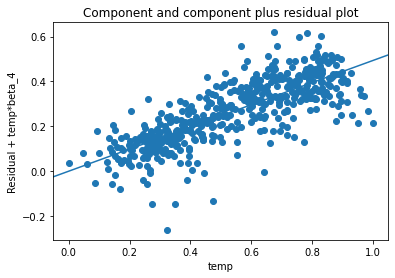

In [87]:
sm.graphics.plot_ccpr(lr_model13 ,"temp")
plt.show()

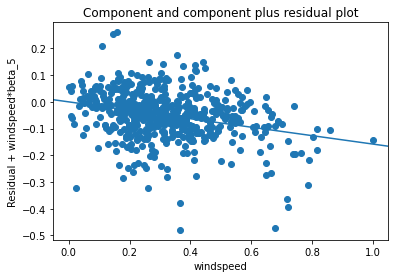

In [88]:
# Lets see that the Linearity assumption is preserved between count and windspeed.
sm.graphics.plot_ccpr(lr_model13, 'windspeed')
plt.show()

 ##### We can say our Linearity is well preserved 

### Multicolinearity check

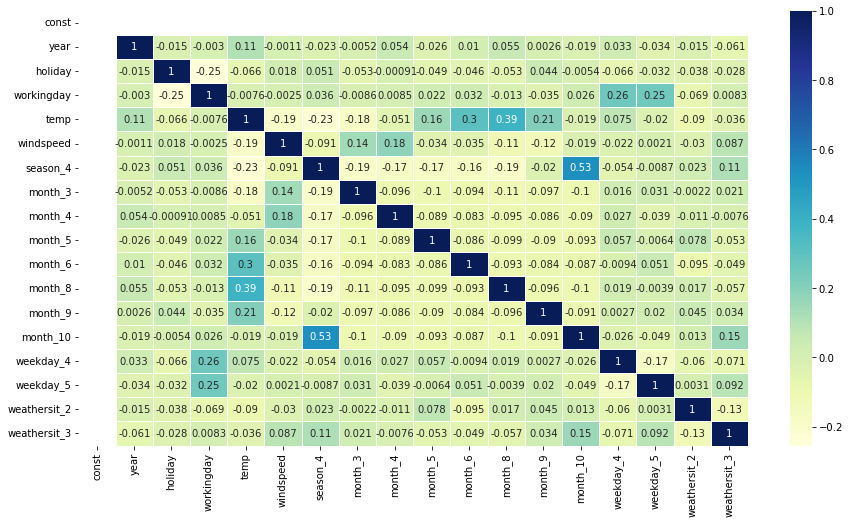

In [89]:
# Plotting heat map to check multicollinearity between predictor variables
plt.figure(figsize=(15,8))
sns.heatmap(x_train_sm13.corr(),annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

#### After seeing the heatmap we can say that there no multicolinearity 

## Step 6 : Residual Analysis of Train Data

In [90]:
y_train_pred = lr_model13.predict(x_train_sm13)
y_train_pred

653    0.729832
576    0.710625
426    0.543180
728    0.366083
482    0.581656
         ...   
526    0.704125
578    0.837291
53     0.218439
350    0.227043
79     0.246217
Length: 510, dtype: float64

<Figure size 432x288 with 0 Axes>

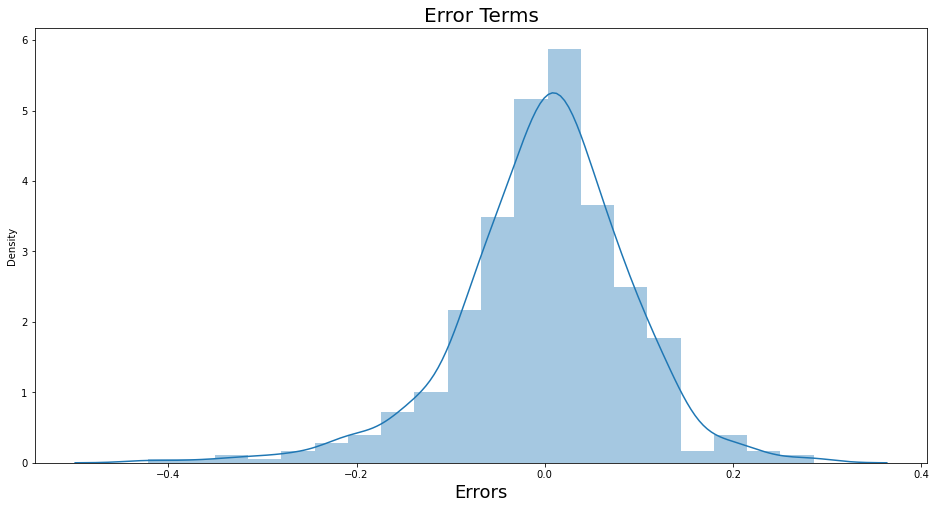

In [91]:
#plot the histogram of the error terms 

fig = plt.figure()
plt.figure(figsize = (16,8))
sns.distplot((y_train - y_train_pred), bins =20)
plt.title("Error Terms" , fontsize = 20)

plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

- We can see Error terms are normally distributed

## Step 7 Prediction and Evaluation of the Model

- Now that we have fitted the model and checked the normality of error terms ,its time to go ahead and make predictions using the final i.e. 13th model

#### Applying the scalling on the test sets 

In [92]:
num_var = ['temp', 'humidity', 'windspeed', 'aparent_temp', 'count']

bike_test[num_var] = scaler.transform(bike_test[num_var])



In [93]:
bike_test.head()

,year,holiday,workingday,temp,aparent_temp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into x_test and y_test



In [94]:
y_test = bike_test.pop('count')

x_test = bike_test

x_test.describe()

,year,holiday,workingday,temp,aparent_temp,humidity,windspeed,season_2,season_3,season_4,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.264840,0.246575,0.232877,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.442259,0.432005,0.423633,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
# Adding constant variable to test dataframe
x_test_sm13 = sm.add_constant(x_test)

# Dropping variables from x_test_m13
x_test_sm13 = x_test_sm13[x_train_sm13.columns]

# Making predictions using the seventh model
y_test_pred = lr_model13.predict(x_test_sm13)

### Evaluation

#### Lets check R-squared and Adjusted R-squared for Test Data

In [96]:
# R-Square for test data

from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_test_pred)
r2

0.810575361548018

In [97]:
# We find adjusted R square using the formula

# First we will define n amd p

# n is the no. of rows in test dataset
n = x_test_sm13.shape[0]

# p is the no. of the features (predictors , p) is the shape along axis 1 
p = x_test_sm13.shape[1]

adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print(adjusted_r2)

0.7935


- So the R-Square of the Test Set is 81% which is pretty close to 83.9% of train set
- The adjusted R-square of test set is 79% which is close to 83.3% of train set 

#### Let's now plot the graph for actual versus predicted values.

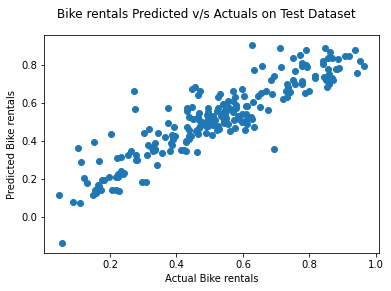

In [98]:
#Plotting y_test and y_pred_m13 to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Bike rentals Predicted v/s Actuals on Test Dataset')        # Plot heading 
plt.xlabel('Actual Bike rentals')                                         # X-label
plt.ylabel('Predicted Bike rentals')  
plt.show()

### Observation
####  The Actual v/s predicted  values are quite close



In [99]:
lr_model13.params

const           0.148958
year            0.232236
holiday        -0.109080
workingday     -0.031339
temp            0.493901
windspeed      -0.158086
season_4        0.137222
month_3         0.065983
month_4         0.116967
month_5         0.118401
month_6         0.085385
month_8         0.071949
month_9         0.131108
month_10        0.038472
weekday_4       0.028869
weekday_5       0.018354
weathersit_2   -0.082129
weathersit_3   -0.286194
dtype: float64

## Summary Of the Model

- The top 3 features contributing significantly towards explaining the demand of shared bikes are-

  - Temp with the coefficient of 0.4939
  - Weathersit_Light Snow/Rain (weathersit = 3) with the coefficient of -0.2861
  - Year (yr) with a coefficient of 0.2322 

## Final Comparision

- Training R-squared : 0.839
- Training Adjusted R-squared : 0.833
- Test R-squared: 0.81
- Test Adjusted R-squared: 0.793
- Difference in R-squared between Training and Test dataset: 2.9%
- Difference in adjusted R-squared between Training and test:4% (<5%)

### Interpretation and Suggestions

- Demand is more during Summer months(higher temperature) and clear weather conditions. So, we can do more promotions during this period.

- The demand has significantly increased in the year 2019 as compared to 2018 as people must have become more aware towards conserving environment and shared bikes rentals is one of the ways to conserve it.

- During spring, and light snow/rain/misty weather conditions the demand goes down as we can see that there is a negative correlation with these variables. Business can provide some offers and discounts during this time to increase the demand.

- We can offer some discount on the working day and we have to create a structure which helps the working personal to rent the bikes easily . If this happen then it will be huge boost for the company 